# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [35]:
pip install plotly==4.9.0

     |████████████████████████████████| 12.9 MB 2.0 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=c758f7c5be1b846f1d9e31a61d99771c72792271aebd23413d3bdb6fcdda0c69
  Stored in directory: /Users/jmirabito/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as scs
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 100)

## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train.csv')
print(df.shape)
df.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [4]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [5]:
# Correlation between sq ft and floors?
print(scs.pearsonr(df.sqft_living, df.sqft_above))
print(scs.pearsonr(df.sqft_living, df.sqft_living15))
print(scs.pearsonr(df.sqft_living, df.floors))



(0.8766956918246036, 0.0)
(0.7550658985518887, 0.0)
(0.3571688089086593, 0.0)


In [6]:
# What do these mean?
df.view.value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [7]:
# What do these mean?
df.condition.value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [8]:
# Overall grade given to the housing unit, based on King County grading system
df.grade.value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [9]:
# Year Renovated - we may have to bin some of these. I'm thinking renovated in past 10 years, past 20 years, 
# more than 20 years ago, and never.
df.yr_renovated.value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [10]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [11]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125
grade,0.666215,0.354679,0.664191,0.762929,0.110320,0.458984,0.092234,0.249554,-0.142066,1.000000,0.758247,0.165003,0.448003,0.007988,-0.184946,0.116196,0.198369,0.715745,0.116062


In [12]:
# In the correlation table above, there are no correlations greater than 0.9.

In [13]:
df.groupby(['zipcode']).price.mean().sort_values(ascending=False)

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
             ...     
98001    2.819988e+05
98148    2.720823e+05
98032    2.516022e+05
98168    2.410415e+05
98002    2.322865e+05
Name: price, Length: 70, dtype: float64

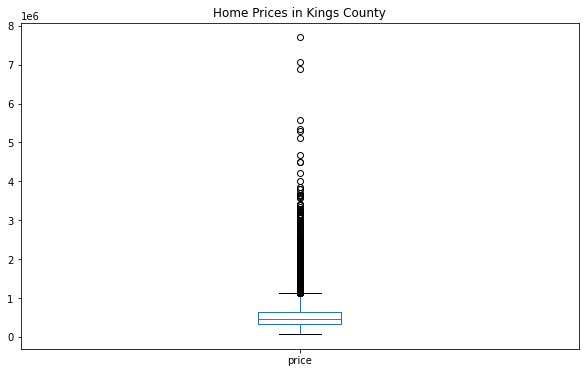

In [14]:
# Visualizing price
df.price.plot(kind='box', figsize=(10,6), title='Home Prices in Kings County')

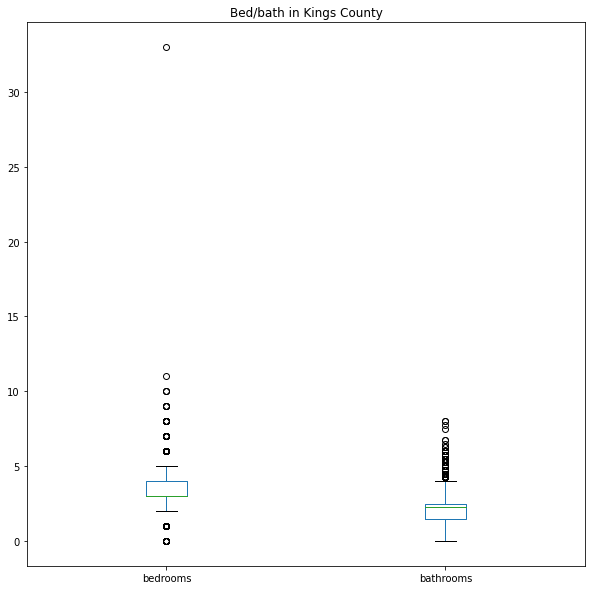

In [15]:
df[['bedrooms','bathrooms']].plot(kind='box', figsize=(10,10), title='Bed/bath in Kings County')

In [16]:
# Some houses have no bedrooms - seems like these are likely studio apartments
df[df['bedrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
10074,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [17]:
list(df.columns)

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [18]:
features = list(df.columns)

In [19]:
n = 4
row_groups= [features[i:i+n] for i in range(1, len(features), n) ]

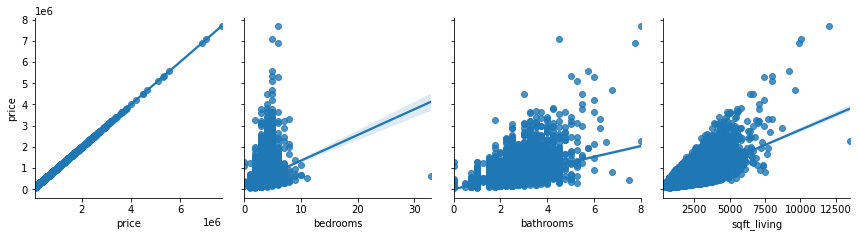

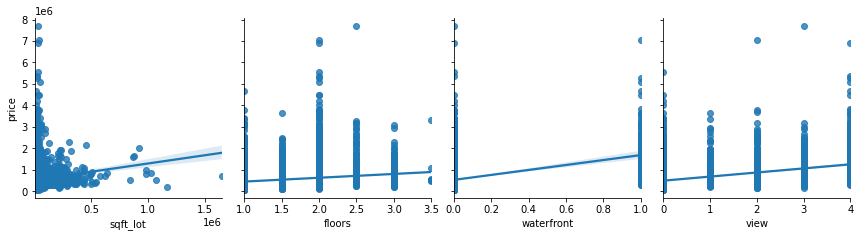

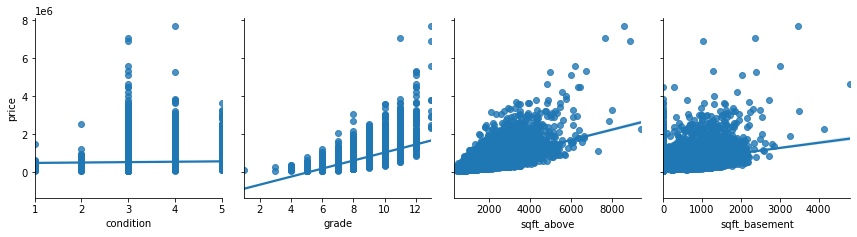

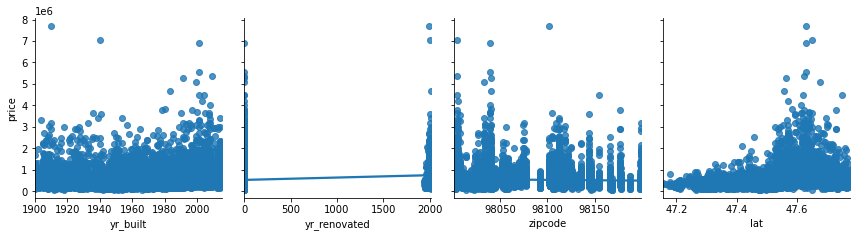

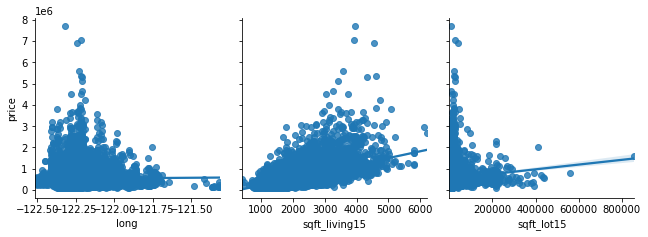

In [367]:
import seaborn as sns

for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)
plt.show()

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

In [20]:
# Cleaning up bedrooms by taking sqrt
df.bedrooms = np.sqrt(df.bedrooms)
df.bedrooms



0        2.000000
1        2.236068
2        2.000000
3        1.732051
4        1.732051
           ...   
17285    2.236068
17286    1.414214
17287    1.732051
17288    1.732051
17289    1.732051
Name: bedrooms, Length: 17290, dtype: float64

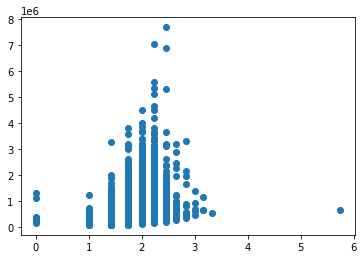

In [21]:
# Plotting relationship between bedrooms_sqrt and price
plt.scatter(df.bedrooms, df.price)

In [23]:
# Comparing correlations between bedrooms_sqrt and bedrooms
print(scs.pearsonr(df.price, df.bedrooms))
# print(scs.pearsonr(df.price, bedrooms_sqrt))

(0.30286351538832507, 0.0)


## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [24]:
df.zipcode.value_counts()

98052    474
98115    465
98103    461
98038    455
98117    437
        ... 
98102     80
98010     74
98024     65
98148     43
98039     42
Name: zipcode, Length: 70, dtype: int64

In [25]:
pd.get_dummies(df['zipcode']).head(10)

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df = pd.concat([df, pd.get_dummies(df['zipcode'])], 1)
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,20141006T000000,365000.0,2.000000,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20140821T000000,865000.0,2.236068,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20140815T000000,1038000.0,2.000000,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20150331T000000,1490000.0,1.732051,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20140714T000000,711000.0,1.732051,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,20140827T000000,211000.0,2.000000,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,20140819T000000,790000.0,2.000000,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,20141017T000000,680000.0,1.732051,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,20140804T000000,384500.0,1.732051,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,20140516T000000,605000.0,1.414214,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [27]:
df.date = df.date.apply(lambda x: x[4:6])

months = {'01': 'January',
          '02': 'Februrary',
          '03': 'March',
          '04': 'April',
          '05': 'May',
          '06': 'June',
          '07': 'July',
          '08': 'August',
          '09': 'September',
          '10': 'October',
          '11': 'November',
          '12': 'December'}
df.date = df.date.map(months)
df.date

0         October
1          August
2          August
3           March
4            July
           ...   
17285       March
17286         May
17287         May
17288    December
17289     January
Name: date, Length: 17290, dtype: object

In [28]:
pd.get_dummies(df['date']).head(10)

,April,August,December,Februrary,January,July,June,March,May,November,October,September
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
df = pd.concat([df, pd.get_dummies(df['date'])], 1)
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,...,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,April,August,December,Februrary,January,July,June,March,May,November,October,September
0,October,365000.0,2.000000,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,August,865000.0,2.236068,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,August,1038000.0,2.000000,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,March,1490000.0,1.732051,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,July,711000.0,1.732051,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,August,211000.0,2.000000,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,August,790000.0,2.000000,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,October,680000.0,1.732051,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8,August,384500.0,1.732051,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,May,605000.0,1.414214,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [30]:
# We can use this variable to calculate the age of the house as a continuous variable
df['house_age'] = 2020 - df.yr_built

In [31]:

df.yr_renovated = 2020 - df.yr_renovated
df.yr_renovated

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
17285    2020
17286    2020
17287    2020
17288    2020
17289    2020
Name: yr_renovated, Length: 17290, dtype: int64

In [32]:


def bin_reno(series):
    bins = []
    for item in series:
        if item==2020:
            bins.append('Never')
        elif item<10:
            bins.append('past_9')
        elif 10<=item<20:
            bins.append('10-19')
        elif 20<=item<30:
            bins.append('20-29')
        elif 30<=item<100:
            bins.append('>30')
    return bins

df.yr_renovated = bin_reno(df.yr_renovated)
                            

In [33]:
pd.get_dummies(df['yr_renovated'])

,10-19,20-29,>30,Never,past_9
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
17285,0,0,0,1,0
17286,0,0,0,1,0
17287,0,0,0,1,0
17288,0,0,0,1,0


In [34]:
df = pd.concat([df, pd.get_dummies(df['yr_renovated'])], 1)
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,...,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,April,August,December,Februrary,January,July,June,March,May,November,October,September,house_age,10-19,20-29,>30,Never,past_9
0,October,365000.0,2.000000,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,Never,98058,47.4388,-122.162,2390,7700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,0,0,0,1,0
1,August,865000.0,2.236068,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,Never,98115,47.6784,-122.285,2370,6283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,43,0,0,0,1,0
2,August,1038000.0,2.000000,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,Never,98006,47.5646,-122.129,3710,9685,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,0,0,0,1,0
3,March,1490000.0,1.732051,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,Never,98034,47.6995,-122.228,4050,14226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,30,0,0,0,1,0
4,July,711000.0,1.732051,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,Never,98052,47.6647,-122.083,2250,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,16,0,0,0,1,0
5,August,211000.0,2.000000,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,Never,98031,47.3947,-122.174,1710,7200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,50,0,0,0,1,0
6,August,790000.0,2.000000,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,Never,98007,47.6596,-122.144,2420,8087,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,0,0,0,1,0
7,October,680000.0,1.732051,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,Never,98199,47.6599,-122.396,1920,4400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,50,0,0,0,1,0
8,August,384500.0,1.732051,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,Never,98027,47.5344,-122.068,1445,1288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,0,0,0,1,0
9,May,605000.0,1.414214,1.00,910,3600,1.0,0,0,4,7,910,0,1909,Never,98119,47.6341,-122.361,1720,3600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,111,0,0,0,1,0


### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [35]:
df['sqft_above'] = df.sqft_above**2
df['sqft_basement'] = df.sqft_basement**2

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [36]:
df['age_x_reno_status'] = df.house_age*df.Never
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,...,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,April,August,December,Februrary,January,July,June,March,May,November,October,September,house_age,10-19,20-29,>30,Never,past_9,age_x_reno_status
0,October,365000.0,2.000000,2.25,2070,8893,2.0,0,0,4,8,4284900,0,1986,Never,98058,47.4388,-122.162,2390,7700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,0,0,0,1,0,34
1,August,865000.0,2.236068,3.00,2900,6730,1.0,0,0,5,8,3348900,1144900,1977,Never,98115,47.6784,-122.285,2370,6283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,43,0,0,0,1,0,43
2,August,1038000.0,2.000000,2.50,3770,10893,2.0,0,2,3,11,14212900,0,1997,Never,98006,47.5646,-122.129,3710,9685,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,0,0,0,1,0,23
3,March,1490000.0,1.732051,3.50,4560,14608,2.0,0,2,3,12,20793600,0,1990,Never,98034,47.6995,-122.228,4050,14226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,30,0,0,0,1,0,30
4,July,711000.0,1.732051,2.50,2550,5376,2.0,0,0,3,9,6502500,0,2004,Never,98052,47.6647,-122.083,2250,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,16,0,0,0,1,0,16


In [37]:
df['age_x_reno9'] = df.house_age*df.past_9
df['age_x_reno1020'] = df.house_age*df['10-19']
df['age_x_reno2030'] = df.house_age*df['20-29']
df['age_x_reno30+'] = df.house_age*df['>30']

In [38]:
# Removing features that are highly correlated
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.shape

(111, 111)

In [39]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
df.drop(columns=to_drop, inplace=True)
df.shape

(17290, 108)

In [40]:
# Removing columns with categorical variables
df.drop(['date', 'yr_renovated', 'yr_built'], axis=1, inplace=True)

In [41]:
df.columns = df.columns.astype(str)
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199',
 'April',
 'August',
 'December',
 'Februrary',
 'January',
 'July',
 'June',
 '

## Step 5A: Train Test Split (Linear Model Predicting Price)

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [50]:
#import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

target = df.price
df_features = df.drop(['price'], axis=1)

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=962020,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 104) Target:  (13832,)
Test set - Features:  (3458, 104) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [51]:
scaler = StandardScaler()

# fit the scaler ONLY to the training data
scaler.fit(X_train)

StandardScaler()

### 5.3) Transform the testing set with the scaler.

In [52]:
#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing data
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

### 5.4) Fit the model to the training data.

In [53]:
from sklearn.linear_model import LinearRegression

# instantiate a linear regression object
lm = LinearRegression()

# fit the linear regression to the data
lm = lm.fit(X_train, y_train)

### 5.5) Use the model to predict on the training set and the test set.

In [54]:
from sklearn import metrics

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

### 5.6) Evaluate the training and test predictions using RMSE.

In [55]:
# Print MRSE value for Training model
price_std = target.std()

print('Training Root Mean Squared Error:' , train_rmse/price_std)

Training Root Mean Squared Error: 0.40276702262076064


### 5.7) Determine if your model is overfit.

In [56]:
print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse)/price_std, "vs. Testing: ", int(test_rmse)/price_std)

Testing Root Mean Squared Error: 180589.1838272563
Training:  0.4027654862438175 vs. Testing:  0.48373913537699365


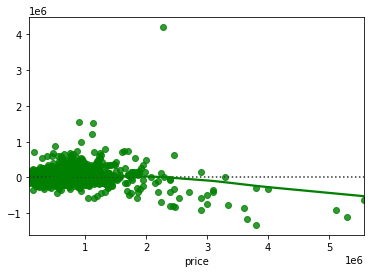

In [58]:
import seaborn as sns
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

## Step 5B: Train Test Split (Linear Model Predicting log(Price))

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

In [100]:
# #take the natural log of the target variable
# y_log = np.log(y_train)


In [564]:
# #instantiate a linear regression object
# lm_log = LinearRegression()

# #fit the linear regression to the data
# lm_log = lm_log.fit(X_train, y_log)

# log_train_pred = lm_log.predict(X_train)

In [567]:
# #Exponentiate the predictions to get them on the same original scale 
# y_train_pred = np.exp(log_train_pred)

In [568]:
# train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


# print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 654923.3364941203


In [569]:
# log_test_pred = lm_log.predict(X_test)
# #exponentiate the predictions to get them on the same original scale 
# log_test_pred = np.exp(log_test_pred)
# log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))


# print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 184784.44962044986


In [571]:
# y_test_log_pred = lm_log.predict(X_test)


# #our model predcicte the log of gross, so now we must exponentiate to get the value in $
# y_test_log_pred = np.exp(y_test_pred)

# test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

# print('Testing Root Mean Squared Error:' , test_rmse)


# print('Training: ', int(train_rmse)/price_std, "vs. Testing: ", int(test_rmse)/price_std)

Testing Root Mean Squared Error: 219102.86102858555
Training:  1.754325489141126 vs. Testing:  0.5869029234303864


<ipython-input-571-68cb8b7495f8>:5: RuntimeWarning:

overflow encountered in exp



In [ ]:
# Predicting log price seems to severely bias our predictions by making our training predictions farther off from
# true values. We'll revert to using price.

## Generating 2nd degree polynomial function

In [59]:
from sklearn.preprocessing import PolynomialFeatures

#Second degree polynomial
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,...,May 20-29,May >30,May Never,May past_9,May age_x_reno_status,November^2,November October,November September,November 10-19,November 20-29,November >30,November Never,November past_9,November age_x_reno_status,October^2,October September,October 10-19,October 20-29,October >30,October Never,October past_9,October age_x_reno_status,September^2,September 10-19,September 20-29,September >30,September Never,September past_9,September age_x_reno_status,10-19^2,10-19 20-29,10-19 >30,10-19 Never,10-19 past_9,10-19 age_x_reno_status,20-29^2,20-29 >30,20-29 Never,20-29 past_9,20-29 age_x_reno_status,>30^2,>30 Never,>30 past_9,>30 age_x_reno_status,Never^2,Never past_9,Never age_x_reno_status,past_9^2,past_9 age_x_reno_status,age_x_reno_status^2
0,2.000000,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,4284900.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,0.0,0.0,1156.0
1,2.236068,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,3348900.0,1144900.0,98115.0,47.6784,-122.285,2370.0,6283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,0.0,0.0,1849.0
2,2.000000,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,14212900.0,0.0,98006.0,47.5646,-122.129,3710.0,9685.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,0.0,0.0,529.0
3,1.732051,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,20793600.0,0.0,98034.0,47.6995,-122.228,4050.0,14226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0,900.0
4,1.732051,2.50,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,6502500.0,0.0,98052.0,47.6647,-122.083,2250.0,4050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,256.0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=962020,test_size=0.2)


In [61]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [62]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,...,May 20-29,May >30,May Never,May past_9,May age_x_reno_status,November^2,November October,November September,November 10-19,November 20-29,November >30,November Never,November past_9,November age_x_reno_status,October^2,October September,October 10-19,October 20-29,October >30,October Never,October past_9,October age_x_reno_status,September^2,September 10-19,September 20-29,September >30,September Never,September past_9,September age_x_reno_status,10-19^2,10-19 20-29,10-19 >30,10-19 Never,10-19 past_9,10-19 age_x_reno_status,20-29^2,20-29 >30,20-29 Never,20-29 past_9,20-29 age_x_reno_status,>30^2,>30 Never,>30 past_9,>30 age_x_reno_status,Never^2,Never past_9,Never age_x_reno_status,past_9^2,past_9 age_x_reno_status,age_x_reno_status^2
0,-0.335766,-0.140912,-0.841575,-0.204278,-0.908685,-0.084037,-0.307220,-0.627308,-0.557792,-0.521253,-0.440324,-0.753668,-1.234814,1.165796,-1.290675,-0.235061,-0.128591,-0.094332,-0.113526,-0.11989,-0.086192,-0.150158,-0.084472,-0.113526,-0.064327,-0.097405,-0.079097,-0.092362,-0.106108,-0.155362,-0.06143,-0.14216,-0.114177,-0.121738,-0.108521,-0.110883,-0.080017,-0.144524,-0.161830,6.134890,-0.046622,-0.116749,-0.158506,-0.099649,-0.166933,-0.136223,-0.110213,-0.140831,-0.148895,-0.147877,...,-0.035079,-0.040812,-0.344312,-0.035079,-0.290283,-0.267085,0.0,0.0,-0.020832,-0.022502,-0.032949,-0.261133,-0.026898,-0.222972,-0.308918,0.0,-0.03183,-0.035079,-0.042552,-0.300273,-0.019016,-0.253154,-0.293061,-0.028212,-0.024056,-0.034031,-0.286021,-0.030671,-0.242108,-0.111549,0.0,0.0,0.0,0.0,0.0,-0.095496,0.0,0.0,0.0,0.0,-0.116431,0.0,0.0,0.0,0.210707,0.0,-0.466469,-0.08871,0.0,-0.598142
1,-0.335766,0.511177,-0.303537,-0.233133,0.946234,-0.084037,-0.307220,-0.627308,-0.557792,-0.152017,-0.440324,-0.828021,1.101378,-0.112992,0.176180,-0.261934,-0.128591,-0.094332,-0.113526,-0.11989,-0.086192,-0.150158,-0.084472,-0.113526,-0.064327,-0.097405,-0.079097,-0.092362,-0.106108,-0.155362,-0.06143,-0.14216,-0.114177,-0.121738,-0.108521,-0.110883,-0.080017,-0.144524,6.179331,-0.163002,-0.046622,-0.116749,-0.158506,-0.099649,-0.166933,-0.136223,-0.110213,-0.140831,-0.148895,-0.147877,...,-0.035079,-0.040812,-0.344312,-0.035079,-0.290283,-0.267085,0.0,0.0,-0.020832,-0.022502,-0.032949,-0.261133,-0.026898,-0.222972,-0.308918,0.0,-0.03183,-0.035079,-0.042552,-0.300273,-0.019016,-0.253154,-0.293061,-0.028212,-0.024056,-0.034031,-0.286021,-0.030671,-0.242108,-0.111549,0.0,0.0,0.0,0.0,0.0,-0.095496,0.0,0.0,0.0,0.0,-0.116431,0.0,0.0,0.0,0.210707,0.0,-0.734460,-0.08871,0.0,-0.733738
2,-0.335766,1.815353,0.245481,-0.219208,-0.908685,-0.084037,-0.307220,-0.627308,0.294830,0.344691,-0.440324,-0.474844,1.098488,1.343406,0.269499,-0.250779,-0.128591,-0.094332,-0.113526,-0.11989,-0.086192,-0.150158,-0.084472,-0.113526,-0.064327,-0.097405,-0.079097,-0.092362,-0.106108,-0.155362,-0.06143,-0.14216,-0.114177,-0.121738,-0.108521,-0.110883,-0.080017,-0.144524,-0.161830,-0.163002,-0.046622,-0.116749,-0.158506,-0.099649,-0.166933,7.340905,-0.110213,-0.140831,-0.148895,-0.147877,...,-0.035079,-0.040812,-0.344312,-0.035079,-0.290283,-0.267085,0.0,0.0,-0.020832,-0.022502,-0.032949,-0.261133,-0.026898,-0.222972,-0.308918,0.0,-0.03183,-0.035079,-0.042552,-0.300273,-0.019016,-0.253154,-0.293061,-0.028212,-0.024056,-0.034031,-0.286021,-0.030671,-0.242108,-0.111549,0.0,0.0,0.0,0.0,0.0,-0.095496,0.0,0.0,0.0,0.0,-0.116431,0.0,0.0,0.0,0.210707,0.0,-1.002452,-0.08871,0.0,-0.830593
3,-0.335766,-0.466956,-0.358439,-0.228590,-0.908685,-0.084037,0.988743,0.906802,0.294830,-0.195025,-0.440324,0.714806,1.006716,-1.192858,0.109107,-0.277072,-0.128591,-0.094332,-0.113526,-0.11989,-0.086192,-0.150158,-0.084

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse/price_std)

Training Root Mean Squared Error: 0.22127586555000406


In [64]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse)/price_std, "vs. Testing: ", int(test_rmse)/price_std)

Testing Root Mean Squared Error: 2671665976651163.5
Training:  0.2212745793871827 vs. Testing:  7156523318.482105


In [65]:
lm_2.score(X_train, y_train)

0.9502564246769886

## Generating third-degree Polynomial

In [850]:
# # Third degree polynomial
# poly_3 = PolynomialFeatures(degree=3, include_bias=False)
# poly3_data = poly_3.fit_transform(df_features)
# poly3_columns = poly_3.get_feature_names(df_features.columns)
# df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)
# df_poly3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,...,10-19 20-29^2,10-19 20-29 >30,10-19 20-29 Never,10-19 20-29 past_9,10-19 20-29 age_x_reno_status,10-19 >30^2,10-19 >30 Never,10-19 >30 past_9,10-19 >30 age_x_reno_status,10-19 Never^2,10-19 Never past_9,10-19 Never age_x_reno_status,10-19 past_9^2,10-19 past_9 age_x_reno_status,10-19 age_x_reno_status^2,20-29^3,20-29^2 >30,20-29^2 Never,20-29^2 past_9,20-29^2 age_x_reno_status,20-29 >30^2,20-29 >30 Never,20-29 >30 past_9,20-29 >30 age_x_reno_status,20-29 Never^2,20-29 Never past_9,20-29 Never age_x_reno_status,20-29 past_9^2,20-29 past_9 age_x_reno_status,20-29 age_x_reno_status^2,>30^3,>30^2 Never,>30^2 past_9,>30^2 age_x_reno_status,>30 Never^2,>30 Never past_9,>30 Never age_x_reno_status,>30 past_9^2,>30 past_9 age_x_reno_status,>30 age_x_reno_status^2,Never^3,Never^2 past_9,Never^2 age_x_reno_status,Never past_9^2,Never past_9 age_x_reno_status,Never age_x_reno_status^2,past_9^3,past_9^2 age_x_reno_status,past_9 age_x_reno_status^2,age_x_reno_status^3
0,2.000000,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,4284900.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,0.0,0.0,1156.0,0.0,0.0,0.0,39304.0
1,2.236068,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,3348900.0,1144900.0,98115.0,47.6784,-122.285,2370.0,6283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,0.0,0.0,1849.0,0.0,0.0,0.0,79507.0
2,2.000000,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,14212900.0,0.0,98006.0,47.5646,-122.129,3710.0,9685.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,0.0,0.0,529.0,0.0,0.0,0.0,12167.0
3,1.732051,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,20793600.0,0.0,98034.0,47.6995,-122.228,4050.0,14226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0,900.0,0.0,0.0,0.0,27000.0
4,1.732051,2.50,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,6502500.0,0.0,98052.0,47.6647,-122.083,2250.0,4050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,256.0,0.0,0.0,0.0,4096.0


In [851]:
# X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state=962020,test_size=0.2)


In [852]:
# scaler3 = StandardScaler()
# # fit the scaler to the training data
# scaler3.fit(X_train)

# #transform the training data
# X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly3.columns)

# #transform the testing dat
# X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly3.columns)

In [853]:
# X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,...,10-19 20-29^2,10-19 20-29 >30,10-19 20-29 Never,10-19 20-29 past_9,10-19 20-29 age_x_reno_status,10-19 >30^2,10-19 >30 Never,10-19 >30 past_9,10-19 >30 age_x_reno_status,10-19 Never^2,10-19 Never past_9,10-19 Never age_x_reno_status,10-19 past_9^2,10-19 past_9 age_x_reno_status,10-19 age_x_reno_status^2,20-29^3,20-29^2 >30,20-29^2 Never,20-29^2 past_9,20-29^2 age_x_reno_status,20-29 >30^2,20-29 >30 Never,20-29 >30 past_9,20-29 >30 age_x_reno_status,20-29 Never^2,20-29 Never past_9,20-29 Never age_x_reno_status,20-29 past_9^2,20-29 past_9 age_x_reno_status,20-29 age_x_reno_status^2,>30^3,>30^2 Never,>30^2 past_9,>30^2 age_x_reno_status,>30 Never^2,>30 Never past_9,>30 Never age_x_reno_status,>30 past_9^2,>30 past_9 age_x_reno_status,>30 age_x_reno_status^2,Never^3,Never^2 past_9,Never^2 age_x_reno_status,Never past_9^2,Never past_9 age_x_reno_status,Never age_x_reno_status^2,past_9^3,past_9^2 age_x_reno_status,past_9 age_x_reno_status^2,age_x_reno_status^3
0,-0.335766,-0.140912,-0.841575,-0.204278,-0.908685,-0.084037,-0.307220,-0.627308,-0.557792,-0.521253,-0.440324,-0.753668,-1.234814,1.165796,-1.290675,-0.235061,-0.128591,-0.094332,-0.113526,-0.11989,-0.086192,-0.150158,-0.084472,-0.113526,-0.064327,-0.097405,-0.079097,-0.092362,-0.106108,-0.155362,-0.06143,-0.14216,-0.114177,-0.121738,-0.108521,-0.110883,-0.080017,-0.144524,-0.161830,6.134890,-0.046622,-0.116749,-0.158506,-0.099649,-0.166933,-0.136223,-0.110213,-0.140831,-0.148895,-0.147877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.095496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.116431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210707,0.0,-0.466469,0.0,0.0,-0.598142,-0.08871,0.0,0.0,-0.567042
1,-0.335766,0.511177,-0.303537,-0.233133,0.946234,-0.084037,-0.307220,-0.627308,-0.557792,-0.152017,-0.440324,-0.828021,1.101378,-0.112992,0.176180,-0.261934,-0.128591,-0.094332,-0.113526,-0.11989,-0.086192,-0.150158,-0.084472,-0.113526,-0.064327,-0.097405,-0.079097,-0.092362,-0.106108,-0.155362,-0.06143,-0.14216,-0.114177,-0.121738,-0.108521,-0.110883,-0.080017,-0.144524,6.179331,-0.163002,-0.046622,-0.116749,-0.158506,-0.099649,-0.166933,-0.136223,-0.110213,-0.140831,-0.148895,-0.147877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.095496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.116431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210707,0.0,-0.734460,0.0,0.0,-0.733738,-0.08871,0.0,0.0,-0.620942
2,-0.335766,1.815353,0.245481,-0.219208,-0.908685,-0.084037,-0.307220,-0.627308,0.294830,0.344691,-0.440324,-0.474844,1.098488,1.343406,0.269499,-0.250779,-0.128591,-0.094332,-0.113526,-0.11989,-0.086192,-0.150158,-0.084472,-0.113526,-0.064327,-0.097405,-0.079097,-0.092362,-0.106108,-0.155362,-0.06143,-0.14216,-0.114177,-0.121738,-0.108521,-0.110883,-0.080017,-0.144524,-0.161830,-0.163002,-0.046622,-0.116749,-0.158506,-0.099649,-0.166933,7.340905,-0.110213,-0.140831,-0.148895,-0.147877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.095496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.116431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210707,0.0,-1.002452,0.0,0.0,-0.830593,-0.08871,0.0,0.0,-0.648621
3,-0.335766,-0.466956,-0.358439,-0.228590,-0.908685,-0.084037,0.988743,0.906802,0.294830,-0.195025,-0.440324,0.714806,1.006716,-1.192858,0.109107,-0.277072,-0.128591,-0.094332,-0.113526,-0.11989,-0.086192,-0.150158,-0.084472,-0.113526,-0.064327,-0.097405,-0.079097,-0.092362,-0.106108,-0.155362,-0.06143,-0.14216,-0.114177,-0.121738,-0.108521,-0.110883,-0.080017,-0.144524,-0.161830,-0.163002,-0.046622,-0.116749,-0.158506,-0.099649,-0.166933,-0.136223,-0.11021

In [ ]:
# # instantiate a linear regression object
# lm_3 = LinearRegression()

# #fit the linear regression to the data
# lm_3 = lm_3.fit(X_train, y_train)

# y_train_pred = lm_3.predict(X_train)

# train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


# print('Training Root Mean Squared Error:' , train_rmse/price_std)

In [588]:
# # use fitted model to predict on test data
# y_pred = lm_3.predict(X_test)

# test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# print('Testing Root Mean Squared Error:' , test_rmse)


# print('Training: ', int(train_rmse)/price_std, "vs. Testing: ", int(test_rmse)/price_std)

Testing Root Mean Squared Error: 6.086221899996787e+16
Training:  0.23060975975137332 vs. Testing:  163030069362.86093


In [ ]:
# Given the large discrepency in RMSEs between the training and the test set, we can conclude that a second-degree
# polynomial is better at predicting the test set than the thrid-degree ploynomial.

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [74]:
# Using X_train from polynomial function.
X_train.shape

(13832, 5564)

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

In [76]:
# Running a for loop to determine which number of features in a polynomial model will minimize the difference 
# between the training and testing RMSE values.

difference_features = []

for i in range(1,500):
    selector = SelectKBest(f_regression, k=i)
    selector.fit(X_train, y_train)

    selected_columns = X_train.columns[selector.get_support()]
    removed_columns = X_train.columns[~selector.get_support()]

    #instantiate a linear regression object
    lm_kbest = LinearRegression()

    #fit the linear regression to the data
    lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

    y_train_kbest = lm_kbest.predict(X_train[selected_columns])


    trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


    y_kbest = lm_kbest.predict(X_test[selected_columns])

    testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

    
    difference_features.append((i, abs(trainK_rmse/price_std - testK_rmse/price_std)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

In [78]:
# Create a df that displays the abs difference between training and test sets for a given numer of features, k.
num_feat_performance = pd.DataFrame(difference_features, columns=["k", "abs_difference"])

In [85]:
num_feat_performance.sort_values(by='abs_difference')

,k,abs_difference
0,1,0.037314
192,193,0.042911
206,207,0.043711
195,196,0.044564
193,194,0.044749
...,...,...
334,335,0.143812
332,333,0.144194
333,334,0.144248
331,332,0.144527


In [97]:
selector = SelectKBest(f_regression, k=193)
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))


difference_features.append((i, abs(trainK_rmse/price_std - testK_rmse/price_std)))

print('Training Root Mean Squared Error:' , trainK_rmse/price_std)

print('Testing Root Mean Squared Error:' , testK_rmse/price_std)

Training Root Mean Squared Error: 0.35707697541526523
Testing Root Mean Squared Error: 0.39998828301313266


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [98]:
lm_kbest.score(X_train[selected_columns], y_train)

0.8704633696571634

In [99]:
print('Original: ', test_rmse/price_std, '\n',
      "KBest:   ", testK_rmse/price_std,'\n')

Original:  7156523318.482106 
 KBest:    0.39998828301313266 



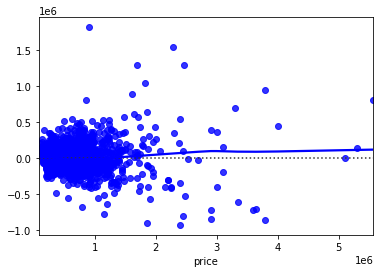

In [101]:
import seaborn as sns
sns.residplot( y_test, y_kbest, lowess=True, color="b")

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [102]:
# Performs much better than old model. However, the old model was a pretty low bar. I opted for using the second-
# degree polynomial given the large number of features to optimize.

## Step 7: Evaluate your different models in order to determine the best model overall

In [103]:
# Kbest model outperformed both the linear model and the second-degree polynomial model at an optimal 193
# features derived from the second-degree polynomial. Third-degree was taking far too long to create. 

## Step 8:  Refit your best model to the entire dataset

In [106]:
# Denoting final variables with _f

selector_f = SelectKBest(f_regression, k=193)
selector_f.fit(df_poly2, target)

selected_columns_f = X_train.columns[selector.get_support()]
removed_columns_f = X_train.columns[~selector.get_support()]

#instantiate a linear regression object
lm_kbest_f = LinearRegression()

#fit the regression to the data
lm_kbest_f = lm_kbest_f.fit(df_poly2[selected_columns_f], target)

lm_kbest_f.coef_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


array([ 2.06267460e+00, -1.30210645e+03, -4.23429891e+04, -3.87510922e+02,
       -3.28008812e+02, -1.06505413e+03, -1.29920328e+03, -2.89659356e+00,
        5.13579112e+01, -2.81210745e+02, -6.79095500e+03, -1.46779526e+00,
        1.11193680e+00,  8.45842279e-02,  1.70923763e+04, -6.73746311e+03,
       -4.90902989e+02,  4.68353104e+04,  2.93892525e+04,  1.94011395e+03,
        1.08552229e+03, -2.12123927e+04,  1.23844742e-01,  3.41909718e-01,
        3.07544642e+01, -1.34636313e+04,  1.22531423e+04, -2.37555063e+02,
       -8.55624463e+02, -1.06920061e+04,  5.52282299e+03, -1.72491764e+04,
        1.99225013e+03,  2.61241061e+02, -2.14069775e+04,  1.50252775e+05,
       -1.35548273e+03, -1.39255926e+04,  1.56199917e+04, -3.52384951e-02,
       -1.42910755e-01,  7.80813745e+01,  1.16294277e+04,  6.87023131e+04,
       -9.46997587e+01, -2.14879709e+03, -3.74687862e+04,  7.01962151e+04,
        5.22162094e+04,  2.11642596e+04,  4.73128134e-02,  1.16382159e-04,
        2.79850085e+02,  

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [107]:
import pickle

pickle_out = open('poly2_kbest.pickle', 'wb')
pickle.dump(lm_kbest_f, pickle_out)
pickle_out.close()